In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from typing import List, Tuple, Dict

from evaluate_prf1 import evaluate_prf1, prf1_sweep

plt.style.use('/home/masonbp/computer/python/matplotlib/publication.mplstyle')

SAVE = False

In [2]:
# def prf1_plot(precisions, recalls, f1s, assoc_reqs):
#     fig, ax = plt.subplots(1,3)
#     ax[0].plot(assoc_reqs, precisions, label='Precision')
#     ax[1].plot(assoc_reqs, recalls, label='Recall')
#     ax[2].plot(assoc_reqs, f1s, label='F1')
#     return ax

def plot_percent_correct(methods: List[str], percent_correct: Dict[str, List[float]], req_err_ang_dist_pairs: np.array, full_names, colors, styles, legend=True):
    ax = plt.gca()
    
    for i, method in enumerate(methods):
        ax.plot(req_err_ang_dist_pairs[:,0], percent_correct[method], label=full_names[method], linestyle=styles[method], color=colors[method])

    ax.set_ylabel('Percent Correct Transformation')
    ax.set_xlabel('Angular Error (deg)')
    ax_cp = ax.twiny()
    ax_cp.set_xlim(ax.get_xlim())
    ax_cp.set_xticks(req_err_ang_dist_pairs[:,0])
    ax_cp.set_xticklabels(req_err_ang_dist_pairs[:,1])
    ax_cp.set_xlabel('Distance Error (m)')
    if legend:
        ax.legend()
    
def reg_accuracy_sweep(pkl_paths, req_overlap=0.5):
    for i, pkl_path in enumerate(pkl_paths):
        pkl_file = open(pkl_path, 'rb')
        if i == 0:
            overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat = pickle.load(pkl_file)
            overlap_mat = np.reshape(overlap_mat, (-1,1))
            err_ang_mat = np.reshape(err_ang_mat, (-1,1))
            err_dist_mat = np.reshape(err_dist_mat, (-1,1))
            num_assoc_mat = np.reshape(num_assoc_mat, (-1,1))
        else:
            om, eam, edm, nam = pickle.load(pkl_file)
            overlap_mat = np.concatenate((overlap_mat, np.reshape(om, (-1,1))), axis=0)
            err_ang_mat = np.concatenate((err_ang_mat, np.reshape(eam, (-1,1))), axis=0)
            err_dist_mat = np.concatenate((err_dist_mat, np.reshape(edm, (-1,1))), axis=0)
            num_assoc_mat = np.concatenate((num_assoc_mat, np.reshape(nam, (-1,1))), axis=0)
    
    req_err_ang_dist_pairs = np.array([
        # (0.25, 0.125),
        (0.5, 0.25),
        (1.0, 0.5),
        (1.5, 0.75),
        (2.0, 1.0),
        (2.5, 1.25),
        (3.0, 1.5),
        # (4.0, 2.0),
        # (5.0, 2.5),
    ])
    
    correct_loc = []
    total_loc = np.sum(overlap_mat > req_overlap)
    for req_err_ang, req_err_dist in req_err_ang_dist_pairs:
        correct_loc.append(np.sum((overlap_mat > req_overlap) & (err_ang_mat < req_err_ang) & (err_dist_mat < req_err_dist)))
    
    return np.array(correct_loc) / total_loc, total_loc, req_err_ang_dist_pairs

In [3]:
results_dir = "/home/masonbp/results/submap_align/20_paper"
geoariprod_results_dir = "/home/masonbp/results/submap_align/19_fusion"
# results_dir = "/home/masonbp/results/submap_align/28_vio/gt_same_segtrack"

# all_methods = ['ransac100K', 'ransac1M', 'point3d', 'prunevol3d', 'prunevolgrav', 'gravity', 'extentvolgrav', 'extentvolgrav_noeps']
# all_methods = ['ransac100K', 'ransac1M', 'ransac10M', 'point3d', 'prunevol3d', 'prunevolgrav', 'gravity', 'extentvolgrav']
all_methods = ['ransac100K', 'ransac1M', 'point3d', 'prunevol3d', 'prunevolgrav', 'gravity', 'extentvolgrav']
fusion_methods = ['product', 'arithmetic_mean', 'geometric_mean']
final_method_list = ['ransac100K', 'ransac1M', 'point3d', 'prunevolgrav', 'gravity', 'product', 'arithmetic_mean', 'extentvolgrav']
# final_method_list = ['ransac100K', 'ransac1M', 'ransac10M', 'point3d', 'prunevolgrav', 'gravity', 'product', 'arithmetic_mean', 'extentvolgrav']
colors = {
    'ransac100K': 'violet',
    'ransac1M': 'orange', #'mediumaquamarine',
    'point3d': 'red',
    'point2d': 'springgreen',
    'prunevol3d': 'mediumblue',
    'prunevolgrav': 'deepskyblue',
    'gravity': 'mediumpurple',
    'extentvolgrav': 'green',
    'extentvolgrav_noeps': 'green',
    'geometric_mean': 'green',
    'arithmetic_mean': 'gold',
    'product': 'mediumblue'
}
styles = {
    'ransac100K': ':',
    'ransac1M': '--',
    'point3d': '-.',
    'point2d': ':',
    'prunevol3d': ':',
    'prunevolgrav': '--',
    'gravity': '--',
    'extentvolgrav': '-.',
    'extentvolgrav_noeps': '-.',
    'geometric_mean': '-.',
    'arithmetic_mean': ':',
    'product': '--'
}
styles = {method: '-' for method in all_methods + fusion_methods}
# styles = {method: '--' for method in all_methods + fusion_methods}
# for method in ['extentvolgrav', 'arithmetic_mean', 'gravity', 'product']:
#     styles[method] = '-'
full_names = {
    'ransac100K': 'RANSAC-100K',
    'ransac1M': 'RANSAC-1M',
    'point3d': 'CLIPPER',
    'point2d': 'Point Only (2D)',
    'prunevol3d': 'Point + Prune Volume',
    'prunevolgrav': 'CLIPPER + Prune',
    'gravity': 'Proposed w/o Shape',
    'extentvolgrav': 'Proposed',
    'extentvolgrav_noeps': 'Gravity/Shape Guided',
    'geometric_mean': 'Geometric Mean',
    'arithmetic_mean': 'Arithmetic Mean',
    'product': 'Product'

}

all_sub_dirs = [
    "sparkal2_sparkal1_same",
    "acl_jackal2_sparkal2_same",
    "acl_jackal2_sparkal1_same",
    "sparkal2_sparkal1_opposite",
    "acl_jackal2_sparkal2_perpendicular",
    "acl_jackal2_sparkal1_perpendicular",
]

fig_width = 3.5
fig_height = fig_width*0.5 # paper
fig_height = fig_width*0.75 # presentation

for method in all_methods:
    if method not in colors:
        colors[method] = 'black'
    if method not in styles:
        styles[method] = '-'
    if method not in full_names:
        full_names[method] = method

# Precision vs Recall Plot

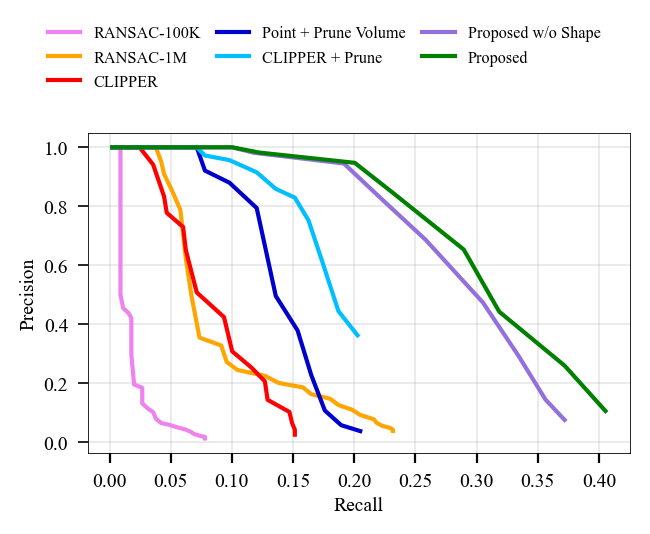

In [4]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
methods = all_methods

req_err_ang = 3
req_err_dist = 1.5
req_overlap = 0.3
sub_dirs = all_sub_dirs

for i, method in enumerate(methods):
    try:
        precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
    except OSError as e:
        print(e)
        continue
    ax.plot(recalls, precisions, label=full_names[method], linestyle=styles[method], color=colors[method])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper left", ncols=3, bbox_to_anchor=(-.1,1.38), frameon=False)
# plt.show()
fig.subplots_adjust(
    top=0.78,
    bottom=0.17,
    # left=0.13,
    # right=0.99
)
ax.grid(True)
# plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_pr.pdf")
    

# Percent Correct Transformation Found Hard Scenarios

Max correct from Extent/Volume/Gravity registration: 0.4915254237288136


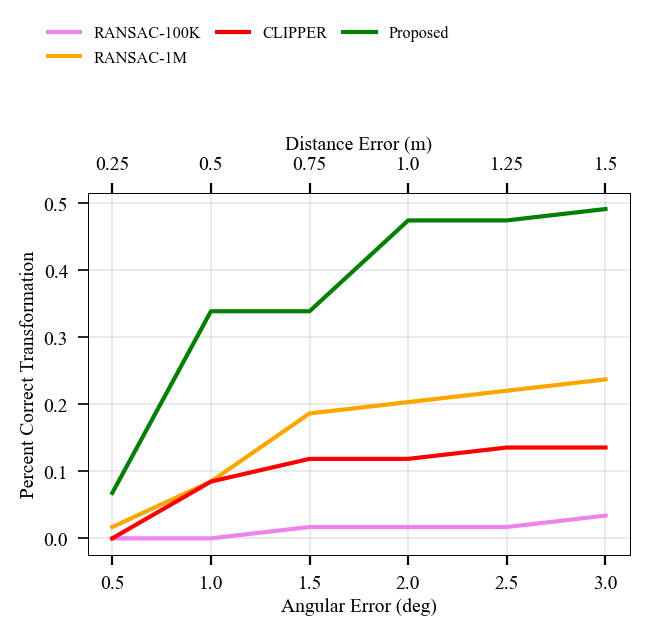

In [5]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
# methods = [method for method in all_methods if method != 'prunevolgrav']
methods = ['ransac100K', 'ransac1M', 'point3d', 'extentvolgrav']
sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' not in sub_dir]
# sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' in sub_dir]
# sub_dirs = all_sub_dirs
req_overlap = 0.5
percent_correct = {}

for method in methods:
    pkl_paths = [f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]
    try:
        pc_meth, total_loc, req_err_ang_dist_pairs = reg_accuracy_sweep(pkl_paths, req_overlap=req_overlap)
        percent_correct[method] = pc_meth
    except:
        print(f"Failed to load {method}")
    
found_methods = [method for method in methods if method in percent_correct]
plot_percent_correct(found_methods, percent_correct, req_err_ang_dist_pairs, full_names, colors, styles, legend=False)

print(f"Max correct from Extent/Volume/Gravity registration: {np.max(percent_correct['extentvolgrav'])}")

# plt.show()
fig.subplots_adjust(
    top=0.85,
    bottom=0.16,
    # left=0.13,
    # right=0.99
)
ax.grid(True)
ax.legend(loc="upper left", ncols=3, bbox_to_anchor=(-.1,1.5), frameon=False)
# plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_hard_acc.pdf")
    

# Timing Analysis

In [6]:
def compute_avg_submap_align_time(dir: str, subdirs: List[str], method: str):
    """
    Sample timing file:

    Total number of submaps: 26 x 30 = 780
    Average time per registration: 0.0325 seconds
    Total time: 25.3844 seconds
    Total number of objects: 1508
    Average number of obects per map: 26.93
    """

    total_time = 0
    total_submaps = 0
    for subdir in subdirs:
        with open(f"{dir}/{subdir}/{method}.timing.txt", 'r') as f:
            lines = f.readlines()
            total_submaps += int(lines[0].split()[-1])
            total_time += float(lines[2].split()[-2])
    return total_time / total_submaps

In [7]:
methods = all_methods + fusion_methods
sub_dirs = all_sub_dirs
for method in methods:
    if method in fusion_methods:
        rd = geoariprod_results_dir
    else:
        rd = results_dir
    try:
        avg_time = compute_avg_submap_align_time(rd, sub_dirs, method)
        print(f"Average time per registration for {method}: {avg_time}")
    except FileNotFoundError:
        print(f"Could not find timing file for {method}")



Average time per registration for ransac100K: 0.03756339468302659
Average time per registration for ransac1M: 0.18763905930470348
Average time per registration for point3d: 0.05776666666666667
Average time per registration for prunevol3d: 0.02379894342194956
Average time per registration for prunevolgrav: 0.022524642126789365
Average time per registration for gravity: 0.04261087252897069
Average time per registration for extentvolgrav: 0.05679717109747785
Average time per registration for product: 0.04541455351056578
Average time per registration for arithmetic_mean: 0.819634662576687
Average time per registration for geometric_mean: 0.049020245398773005


# Average Map Size

In [8]:
def compute_avg_submap_size(dir: str, subdirs: List[str], method: str):
    """
    Sample timing file:

    Total number of submaps: 26 x 30 = 780
    Average time per registration: 0.0325 seconds
    Total time: 25.3844 seconds
    Total number of objects: 1508
    Average number of obects per map: 26.93
    """

    total_objs = 0
    total_submaps = 0
    for subdir in subdirs:
        with open(f"{dir}/{subdir}/{method}.timing.txt", 'r') as f:
            lines = f.readlines()
            total_submaps += int(lines[0].split()[-5]) + int(lines[0].split()[-3])
            total_objs += int(lines[3].split()[-1])
    return total_objs / total_submaps

avg_objs_per_submap = compute_avg_submap_size(results_dir, all_sub_dirs, 'extentvolgrav')
print(f"Average number of objects per submap: {avg_objs_per_submap}")

Average number of objects per submap: 32.99212598425197


# Geometric vs Arithmetic vs Product

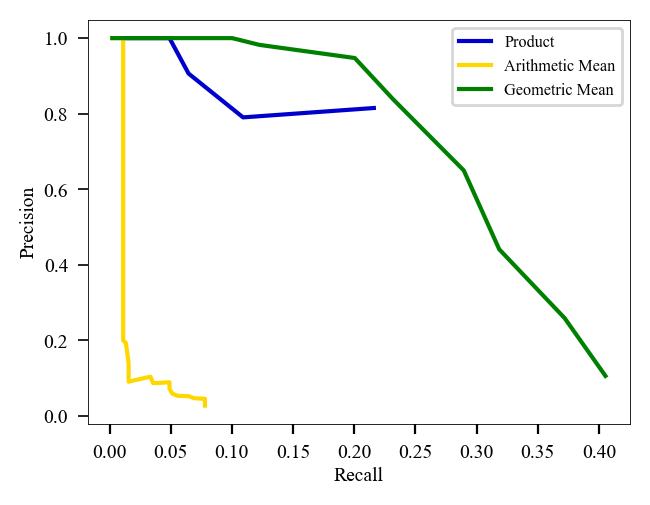

In [9]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
methods = fusion_methods
# sub_dirs = [sd for sd in all_sub_dirs if 'opposite' in sd]
sub_dirs = all_sub_dirs

req_err_ang = 3
req_err_dist = 1.5
req_overlap = 0.3

for i, method in enumerate(methods):
    try:
        precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{geoariprod_results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
    except OSError as e:
        print(e)
        continue
    full_names[method]
    styles[method]
    colors[method]
    ax.plot(recalls, precisions, label=full_names[method], linestyle=styles[method], color=colors[method])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()

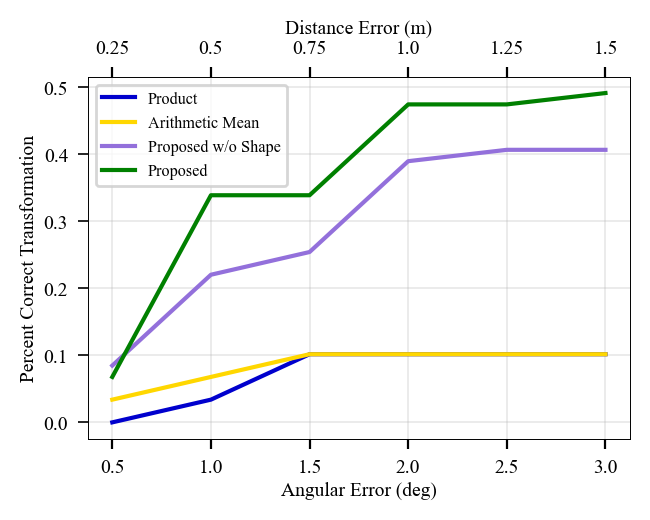

In [10]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
methods = ['product', 'arithmetic_mean', 'gravity', 'extentvolgrav']
sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' not in sub_dir]
req_overlap = 0.5
percent_correct = {}

for method in methods:
    if method in all_methods:
        pkl_files = [f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]  
    else:
        pkl_files = [f"{geoariprod_results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]
    try:
        pc_meth, total_loc, req_err_ang_dist_pairs = reg_accuracy_sweep(pkl_files, req_overlap=req_overlap)
    except OSError as e:
        print(e)
        continue
    percent_correct[method] = pc_meth
    
plot_percent_correct(methods, percent_correct, req_err_ang_dist_pairs, full_names, colors, styles, legend=False)
ax.grid(True)
ax.legend()
fig.subplots_adjust(
    top=0.85,
    bottom=0.16,
    # left=0.13,
    # right=0.99
)
if SAVE:
    plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_hard_fusion.pdf")

# Combined hard plots

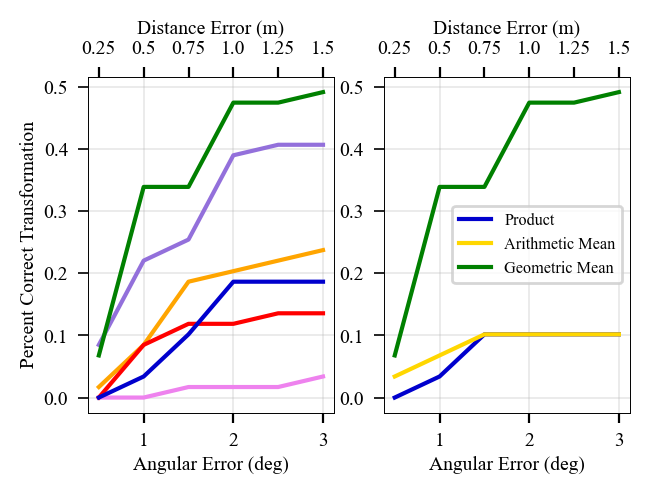

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(fig_width, fig_height), dpi=200)
methods = [method for method in all_methods if method != 'prunevolgrav']
sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' not in sub_dir]
# sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' in sub_dir]
# sub_dirs = all_sub_dirs
req_overlap = 0.5
percent_correct = {}

for method in methods:
    pkl_paths = [f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]
    pc_meth, total_loc, req_err_ang_dist_pairs = reg_accuracy_sweep(pkl_paths, req_overlap=req_overlap)
    percent_correct[method] = pc_meth
    
plt.sca(ax[0])
plot_percent_correct(methods, percent_correct, req_err_ang_dist_pairs, full_names, colors, styles, legend=False)

methods = fusion_methods
sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' not in sub_dir]
req_overlap = 0.5
percent_correct = {}

for method in methods:
    pkl_paths = [f"{geoariprod_results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]
    pc_meth, total_loc, req_err_ang_dist_pairs = reg_accuracy_sweep(pkl_paths, req_overlap=req_overlap)
    percent_correct[method] = pc_meth
    
plt.sca(ax[1])
plot_percent_correct(methods, percent_correct, req_err_ang_dist_pairs, full_names, colors, styles, legend=False)
# ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax[1].set_ylabel('')


ax[0].grid(True)
ax[1].grid(True)
ax[1].legend()
fig.subplots_adjust(
    top=0.82,
    bottom=0.18,
    # left=0.13,
    # right=0.99
)
if SAVE:
    plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_hard_combined.pdf")

# Combined Final Plots

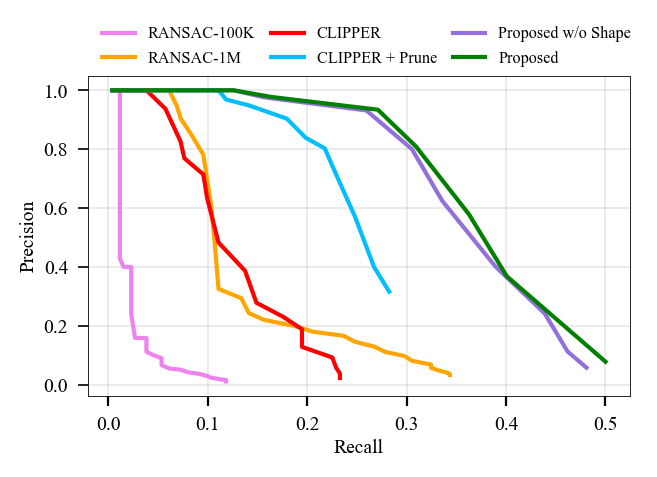

In [12]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
# methods = final_method_list
methods = [method for method in all_methods if method != 'prunevol3d']

req_err_ang = 3
req_err_dist = 1.5
req_overlap = 0.5
sub_dirs = all_sub_dirs
# sub_dirs = [sd for sd in all_sub_dirs if 'same' not in sd]

for i, method in enumerate(methods):
    try:
        if method in all_methods:
            pkl_files = [f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]  
        else: 
            pkl_files = [f"{geoariprod_results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]
        precisions, recalls, f1s, assoc_reqs = prf1_sweep(pkl_files, req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
    except OSError as e:
        continue
    ax.plot(recalls, precisions, label=full_names[method], linestyle=styles[method], color=colors[method])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
if methods == final_method_list:
    ax.legend(loc="upper left", ncols=3, bbox_to_anchor=(-.0,1.39), frameon=False)
else:
    ax.legend(loc="upper left", ncols=3, bbox_to_anchor=(-.0,1.2), frameon=False)
# plt.show()
fig.subplots_adjust(
    top=0.78,
    bottom=0.17,
    # left=0.13,
    # right=0.99
)
ax.grid(True)
if SAVE:
    plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_pr.pdf")

Max correct from Extent/Volume/Gravity registration: 0.4915254237288136
Max correct from RANSAC-1M registration: 0.23728813559322035
Total localization events: 59


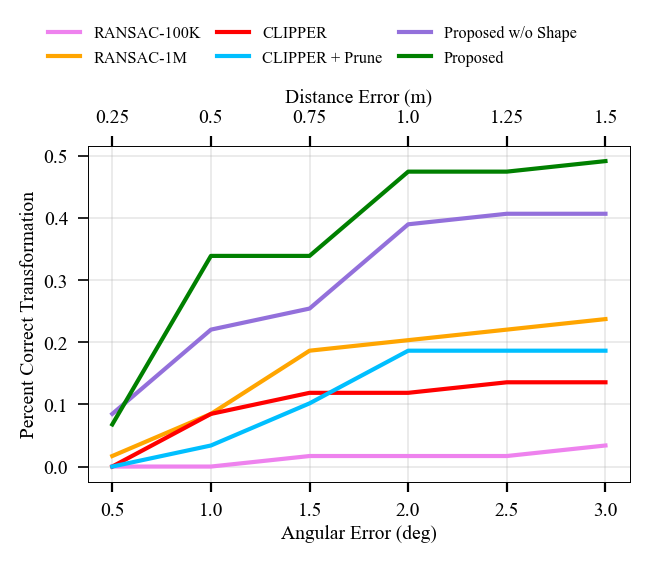

In [13]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
methods = final_method_list
methods = [method for method in all_methods if method != 'prunevol3d']
include_legend=True

sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' not in sub_dir]
# sub_dirs = [sub_dir for sub_dir in all_sub_dirs if 'same' in sub_dir]
# sub_dirs = all_sub_dirs
req_overlap = 0.5
percent_correct = {}

for method in methods:
    if method in all_methods:
        pkl_files = [f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]  
    else: 
        pkl_files = [f"{geoariprod_results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs]
    pc_meth, total_loc, req_err_ang_dist_pairs = reg_accuracy_sweep(pkl_files, req_overlap=req_overlap)
    percent_correct[method] = pc_meth
    
plot_percent_correct(methods, percent_correct, req_err_ang_dist_pairs, full_names, colors, styles, legend=False)

print(f"Max correct from Extent/Volume/Gravity registration: {np.max(percent_correct['extentvolgrav'])}")
print(f"Max correct from RANSAC-1M registration: {np.max(percent_correct['ransac1M'])}")
print(f"Total localization events: {total_loc}")

# plt.show()
fig.subplots_adjust(
    top=0.82,
    bottom=0.18,
    # left=0.13,
    # right=0.99
)
ax.grid(True)
if include_legend:
    ax.legend(loc="upper left", ncols=3, bbox_to_anchor=(-.1,1.4), frameon=False)
if SAVE:
    plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_hard.pdf")
    